### Bipartiteness, Edmonds-Karp / Ford-Fulkerson Algorithm for Max Flow,  Max Bipartite Matching

#### 1- Python program to find out whether a given graph is bipartite or not 
Algorithm: With BFS, start coloring each node either for 0 or 1 in this order: Assign color 0 to the source vertex. Color all the neighbors with the color 1. Color all neighbor’s neighbor with 0 color.

If all vertices connected to each other have different colors, then the graph is bipartite. 

Assumptions: Graph is connected and if it has no edges, it is still a bipartite graph.
  

In [1]:
# create a densely connected test graph where there are 2 sets of nodes, colored either with 0 or 1. 
# Make sure no nodes are connected to its own kind. The 1's in the graph means there is an edge between these nodes.

# Edges between vertices:

# 0 -- 1   0 -- 3   0 -- 5
   
# 2 -- 3   2 -- 1   2 -- 5
  
# 4 -- 5   4 -- 1   4 -- 3

# with the reverse edges, makes total 18 directed connections between 6 nodes (noted with 1) in the below matrix

import numpy as np
m = 6
raw_matrix = np.zeros([m, m], dtype = int)
for i in range(len(raw_matrix)): # for each row
    for j in range(len(raw_matrix[0])): # for each column
        if i % 2 == 0 and j % 2 == 1: # if the i index is even and j is odd
            raw_matrix[i][j] = 1
        if i % 2 == 1 and j % 2 == 0: # if the in index is odd and j is even
            raw_matrix[i][j] = 1

print(raw_matrix)

test_matrix = raw_matrix

[[0 1 0 1 0 1]
 [1 0 1 0 1 0]
 [0 1 0 1 0 1]
 [1 0 1 0 1 0]
 [0 1 0 1 0 1]
 [1 0 1 0 1 0]]


In [2]:
# use the test matrix above to test the function below
            
def check_if_bipartite(matrix): 
   
    # Create a color list for each vertex
    color_list = [False] * len(matrix) # assign -1 to each vertex, the vertices later will take 0 or 1

    # Assign first color to source vertex, pick the first vertex as source vertex for convenience
    color_list[0] = 1

    # Create a queue (FIFO) of vertex numbers and enqueue source vertex for BFS traversal 
    queue = [] 
    queue.append(0) # add the first vertex as source vertex to start the BFS

    while len(queue) > 0: 

        # pop the the first vertex to see its connections
        u = queue.pop(0) # queue will push from the end (append) and pop from the head (pop(0))
        
        # Return false if there is a self-loop 
        if matrix[u][u] == 1: return False
        
        for v in range(len(matrix)): # check all connections of the selected vertex
            
            # if an edge from u to v exists and destination v is not visited, color v into a different group
            if matrix[u][v] == 1 and color_list[v] == False: 
                # if u is 0 then v is 1, or if u is 1 then v is 0
                if color_list[u] == 0: 
                    color_list[v] = 1
                else:
                    color_list[v] = 0
                # push the vertex v into the queue
                queue.append(v) 

            # if an edge from u to v exists but both vertices have the same color, return False
            elif matrix[u][v] == 1 and color_list[v] == color_list[u]: return False
            
    
    print(color_list) # view the color list
    return True

        
check_if_bipartite(test_matrix)               


[1, 0, 1, 0, 1, 0]


True

#### 2- Python program for finding the maximum flow in a graph 
#### (Edmonds-Karp Algorithm Implimentation of Ford-Fulkerson Algorithm)

  

In [3]:
# Maximum flow implimentation of a network of connections with the help of BFS, 
# Rendition of the wikipedia solution at https://en.wikipedia.org/wiki/Ford%E2%80%93Fulkerson_algorithm

import numpy as np

class Graph: 
   
    def __init__(self, graph): 
        self.graph = np.copy(graph) # graph with max flow capacities from each vertex 
        
    # Returns tne maximum flow from s to t in the given graph 
    def max_flow_edmonds_karp(self, source, sink): 
        N, D = self.graph.shape
        # initialize a parent array
        parent = -np.ones(D, dtype = int) 
  
        # augment the flow while there is path from source to sink, 
        # for each path between source and sink, the parent array is continually updated with BFS
        while self.BFS(source, sink, parent):
            
            # Find minimum residual capacity (or max flow) of the edges along the path filled by BFS. 
            min_path_flow = np.inf 
            t = sink # initialize target as sink 
            
            # from sink to source traverse all parents and find the min flow between all vertices
            while(t !=  source): 
                min_path_flow = min(min_path_flow, self.graph[parent[t]][t]) 
                t = parent[t] 
  
            # update residual capacities of the edges and reverse edges along the path 
            v = sink 
            while(v !=  source): 
                u = parent[v] 
                self.graph[u][v] -= min_path_flow 
                self.graph[v][u] += min_path_flow 
                v = parent[v] 
        # the residual network is updated
    
        # extract the optimized network flow from the optimized residual network
        updated_network = self.draw_the_updated_network_flow()
        
        print('network of the optimized graph with the max flow:')
        print(updated_network) # to view the network in equilibrium (when in is equal to out)
        # assert that total amount dispatched from source is equal to the total amount received at target 
        assert(np.sum(updated_network[source , :]) == np.sum(updated_network[: , sink]))
        # the max flow into the system at equilibrium is ready to output
        return np.sum(updated_network[source, :]) # sum of all inputs from the source vertex into the network
    
 
    # simple BFS checks if there is a path from s to t, and returns T or F of a changing graph with a parent array
    def BFS(self, source, target, parent): 
        # parent array is an additional feature that will keep being updated for each time BFS is run
  
        # Mark all the vertices as not visited 
        visited =[False]*(len(self.graph)) 
        
        # Create a queue for BFS 
        queue=[] 
          
        # Mark the source node as visited and enqueue it 
        queue.append(source) 
        visited[source] = True
           
         # Standard BFS Loop 
        while len(queue) > 0: 
  
            #Dequeue a vertex from queue and print it 
            u = queue.pop(0) 
          
            # Get all adjacent vertices of the dequeued vertex u that have not been visited, 
            # mark them visited and then enqueue  
            for i in range(len(self.graph[u])): 
                # check if the index is not visited and graph has a value at [u][i] that is being updated
                if visited[i] == False and self.graph[u][i] > 0:
                    # append the vertex to the queue, mark it as True, update parent for all connecting vertices 
                    queue.append(i) 
                    visited[i] = True
                    parent[i] = u 
        
        # if we reached sink in BFS starting from source, then return true, else false 
        # equilibrium is reached when source vertex output == target vertex input 
        # when self.graph[target vertex][vertex_at_i_index] == 0 so that visited[t] returns FALSE
        return visited[target] # returns True if visited[t] else it returns False (flow conservation)

    
    def draw_the_updated_network_flow(self):
        # transpose of the final residual graph would be the graph with the optimized max flow 
        n , d = self.graph.shape
        updated_graph = np.zeros([d, n], dtype = float)
        for i in range(n):
            for j in range(d):
                updated_graph[j][i] = self.graph[i][j]
        return updated_graph
    
    
    
test_graph = np.array([[0, 16, 13, 0, 0, 0], 
                       [0, 0, 10, 12, 0, 0], 
                       [0, 4, 0, 0, 14, 0], 
                       [0, 0, 9, 0, 0, 20], 
                       [0, 0, 0, 7, 0, 4], 
                       [0, 0, 0, 0, 0, 0]] , dtype = float)
  

g = Graph(test_graph) 
print('max flow: ', g.max_flow_edmonds_karp(0, 5), '\n') 
print('original graph:', '\n', np.array(test_graph)) # view the original flow of the network
 # to view how the graph has been shaped to its final form

    
# The above implementation of Ford Fulkerson Algorithm is called Edmonds-Karp Algorithm. 
# The idea of Edmonds-Karp is to use BFS in Ford Fulkerson implementation as BFS which always picks a path 
# with minimum number of edges. When BFS is used, the worst case time complexity can be reduced to O(VE2).
    

network of the optimized graph with the max flow:
[[ 0. 12. 11.  0.  0.  0.]
 [ 4.  0.  4. 12.  0.  0.]
 [ 2. 10.  0.  9. 11.  0.]
 [ 0.  0.  0.  0.  0. 19.]
 [ 0.  0.  3.  7.  0.  4.]
 [ 0.  0.  0.  1.  0.  0.]]
max flow:  23.0 

original graph: 
 [[ 0. 16. 13.  0.  0.  0.]
 [ 0.  0. 10. 12.  0.  0.]
 [ 0.  4.  0.  0. 14.  0.]
 [ 0.  0.  9.  0.  0. 20.]
 [ 0.  0.  0.  7.  0.  4.]
 [ 0.  0.  0.  0.  0.  0.]]


[]

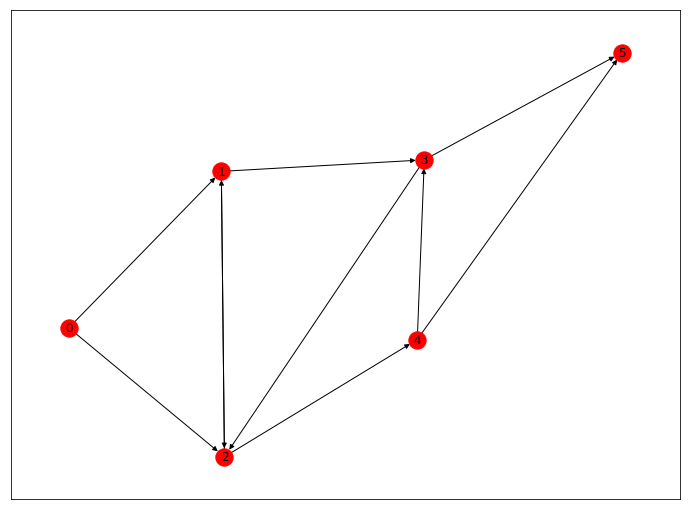

In [9]:
# importing networkx to visualize the connections above

import matplotlib.pyplot as plt
import networkx as nx 
plt.figure(figsize =(12, 9))
g_visual = nx.DiGraph() 

for i in range(len(test_graph)): # for each row
    for j in range(len(test_graph[0])): # for each column
        if test_graph[i][j] > 0: 
            g_visual.add_edge(i, j)

nx.draw_networkx(g_visual, with_label = True, node_color ='red')
plt.plot()

#### 3- Maximum bipartite matching algorithm

In [5]:
# prepare the bipartite graph test set 
# ex: where rows are people and columns are available jobs

test_matrix =   [[0, 1, 1, 0, 0, 0], 
                 [1, 0, 0, 1, 0, 0], 
                 [0, 0, 1, 0, 0, 0], 
                 [0, 0, 1, 0, 1, 0], 
                 [1, 0, 0, 0, 0, 0], 
                 [0, 0, 0, 0, 0, 1]] 

test_matrix = np.array(test_matrix)
print(test_matrix)

[[0 1 1 0 0 0]
 [1 0 0 1 0 0]
 [0 0 1 0 0 0]
 [0 0 1 0 1 0]
 [1 0 0 0 0 0]
 [0 0 0 0 0 1]]


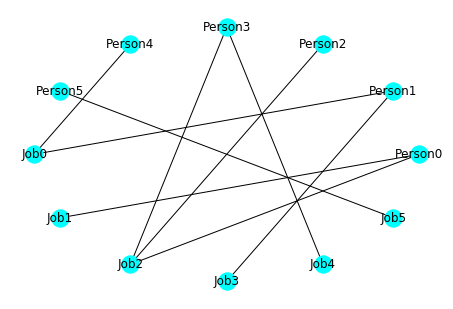

In [6]:
# visualize the problem:

import matplotlib.pyplot as plt
%matplotlib inline
import networkx as nx, numpy as np
from networkx.algorithms import bipartite
from scipy.sparse import csc_matrix

G = nx.Graph()

# Give names to the nodes in the two node sets
U = [ "Person{}".format(i) for i in range(test_matrix.shape[0]) ]
V = [ "Job{}".format(i) for i in range(test_matrix.shape[1]) ]

# Create the graph and add each set of nodes

G.add_nodes_from(U, bipartite=0)
G.add_nodes_from(V, bipartite=1)

# Find the non-zero indices in the biadjacency matrix to connect those nodes
G.add_edges_from([(U[i], V[j]) for i, j in zip(*test_matrix.nonzero())]) # ex: 0 0 1 1 2 3 3 5] [1 2 0 3 2 2 3 5]


RB = nx.complete_bipartite_graph(6, 6)
A  = csc_matrix(bipartite.biadjacency_matrix(RB, row_order=bipartite.sets(RB)[0]))
nx.draw_circular(G, node_color = "cyan", size = 100, with_labels = True)

plt.show()

In [7]:
# Python program to find maximal bipartite matching. 

import numpy as np
    
class bpm: 
    def __init__(self, graph): 
        self.graph = graph  # people are the rows (N) and (D) jobs are the columns
  

    # create a function that returns maximum number of matching 
    # for each applicant initialize a seen list and see if dfs returns True for this applicant 
    def max_bipartite_match(self): 
        # create a job match list that will keep track of which applicant gets which job
        # the job array will be filled with the applicant's index number
        jobs_array = [-1] * len(self.graph)
          
        # Count of jobs assigned to applicants 
        result = 0 
        for each_applicant in range(len(self.graph)): # for each applicant, create a seen array
              
            # Mark all jobs as not seen for next applicant and do a dfs search
            seen_jobs = [False] * len(self.graph)
              
            # if the applicant i can get a job increase the max number of jobs by one
            if self.dfs(each_applicant, jobs_array, seen_jobs): 
                result += 1
   
        # print(jobs_array) # view the final form of the applicants array that matched people to jobs
        return result , jobs_array
    
    
    # create a function that returns true if a matching is posibble while updating the job matching list
    def dfs(self, u, jobs_array, seen_jobs): 
        # for each job, see if there is a connection already and if that job is already seen
        for v in range(len(self.graph)): 
            # if applicant u is interested in job v and v is not seen 
            if self.graph[u][v] > 0 and seen_jobs[v] == False: 
                # mark job as visited 
                seen_jobs[v] = True 
                # if the job has not been assigned yet or the previously assigned person has an alternative job,
                # give this job to the previous person. applicants[v] means which candidate has job v?
                # if applicants[v] == -1 or self.dfs(applicants[v], applicants, seen_jobs): 
                if jobs_array[v] == -1 or self.dfs(jobs_array[v], jobs_array, seen_jobs):
                    # update the match list
                    jobs_array[v] = u 
                    return True
        return False

g = bpm(test_matrix)
print(g.graph) # reminder of the graph
g.max_bipartite_match() # max number of matches, jobs list just to view who got which job


[[0 1 1 0 0 0]
 [1 0 0 1 0 0]
 [0 0 1 0 0 0]
 [0 0 1 0 1 0]
 [1 0 0 0 0 0]
 [0 0 0 0 0 1]]


(6, [4, 0, 2, 1, 3, 5])

#### Note: This function below will be used in other types of flow problems in the future notebooks

In [8]:
# Find if there is a subarray with zero sum so that the balance points can be extracted from the flow chart 
# suppose the flow from A to B was recorded as: 4, 2, -3, 1, 6 units every minute. What subarray sum would yield 0?
# answer: 2, -3, 1  

def find_zero_sum_subarray(flow_arr):
    # if sum has any zero OR there are two numbers repeating each other, it means there is a zero sum sub array
    # s has all items added in order from first to last index
    s = [] 
    sum_of_items = 0
    n = len(flow_arr) 
    for i in range(n): 
        sum_of_items += flow_arr[i] 
        s.append(sum_of_items) 
        if sum_of_items == 0:
            return flow_arr[:i+1]

    # if nothing summed up to 0 but all items are summed to some several other values, 
    # add all items in a dictionary to see if there are any double values
    a_dict = {}
    for each_sum in range(len(s)):
        item = s[each_sum]
        if item in a_dict:
            a_dict[item] += 1
            mark_the_index = each_sum # last seen repetition's index is marked 
        else:
            a_dict[item] = 1
    print(s, a_dict) # to view the duplicates if needed
   
    # mark the values of the dictinary if there are two items that has the same sum value
    for k in a_dict.keys():
        v = a_dict[k]
        if v > 1: # if the item is seen more than once 
            start_index = s.index(mark_the_index) # python built-in method only shows the first index that item is seen
            end_index = mark_the_index 
            # start index is not included but mark index is included since sub-array summing 0 starts after 
            return flow_arr[start_index+1 : mark_the_index+1] # sum array : [4, 6, 3, 4, 10] 
    
    return None
    
test_1 = [4, 2, -3, 1, 6] 
test_2 = [4, 2, -3, -1, -2, 6]

find_zero_sum_subarray(test_2)


[4, 2, -3, -1, -2]